In [1]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict



In [29]:
def makeImage(text):
    alice_mask = np.array(Image.open("data/alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    wc.to_file("data/out.png")
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

In [28]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'data/alice.txt'), encoding='utf-8')
text = text.read()

dic_text = getFrequencyDictForText(text)

#dic_text

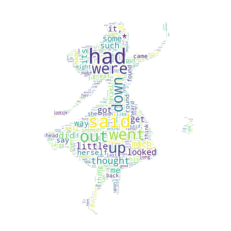

In [30]:
makeImage(dic_text)